In [4]:
import os
from surprise import Reader, Dataset, GridSearch, SVD, SVDpp, NMF, accuracy, BaselineOnly
import numpy as np
import matplotlib.pyplot as plt


file_path = os.path.expanduser('sampled_data.csv')
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_file(file_path, reader=reader)
data.split(n_folds=5) # data can now be used normally
training = data.build_full_trainset()
testing = training.build_anti_testset()

param_grid = {'n_factors': [25, 50, 100, 250], 'n_epochs': [10, 20, 30, 40, 50]}
grid_search = GridSearch(SVD, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data)
param = grid_search.best_params['RMSE']
print('SVD:', param)
svd = SVD(n_factors=param['n_factors'], n_epochs=param['n_epochs'])
svd.train(training)
predictions = svd.test(testing)
svd_rmse = accuracy.rmse(predictions, verbose=True)


grid_search = GridSearch(SVDpp, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data)
param = grid_search.best_params['RMSE']
print('SVDpp:', param)
svdpp = SVDpp(n_factors=param['n_factors'], n_epochs=param['n_epochs'])
svdpp.train(training)
predictions = svdpp.test(testing)
svdpp_rmse = accuracy.rmse(predictions, verbose=True)

nmf_param_grid = {'n_factors': [45, 50, 55, 60], 'n_epochs': [45, 50, 55]}
grid_search = GridSearch(NMF, nmf_param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data)
param = grid_search.best_params['RMSE']
print('NMF:', param)
nmf = NMF(n_factors=param['n_factors'], n_epochs=param['n_epochs'])
nmf.train(training)
predictions = nmf.test(testing)
nmf_rmse = accuracy.rmse(predictions, verbose=True)

baseline = BaselineOnly()
baseline.train(training)
predictions = baseline.test(testing)
baseline_rmse = accuracy.rmse(predictions, verbose=True)


[{'n_factors': 25, 'n_epochs': 10}, {'n_factors': 25, 'n_epochs': 20}, {'n_factors': 25, 'n_epochs': 30}, {'n_factors': 25, 'n_epochs': 40}, {'n_factors': 25, 'n_epochs': 50}, {'n_factors': 50, 'n_epochs': 10}, {'n_factors': 50, 'n_epochs': 20}, {'n_factors': 50, 'n_epochs': 30}, {'n_factors': 50, 'n_epochs': 40}, {'n_factors': 50, 'n_epochs': 50}, {'n_factors': 100, 'n_epochs': 10}, {'n_factors': 100, 'n_epochs': 20}, {'n_factors': 100, 'n_epochs': 30}, {'n_factors': 100, 'n_epochs': 40}, {'n_factors': 100, 'n_epochs': 50}, {'n_factors': 250, 'n_epochs': 10}, {'n_factors': 250, 'n_epochs': 20}, {'n_factors': 250, 'n_epochs': 30}, {'n_factors': 250, 'n_epochs': 40}, {'n_factors': 250, 'n_epochs': 50}]
('SVD:', {'n_factors': 100, 'n_epochs': 30})
RMSE: 0.4037
[{'n_factors': 25, 'n_epochs': 10}, {'n_factors': 25, 'n_epochs': 20}, {'n_factors': 25, 'n_epochs': 30}, {'n_factors': 25, 'n_epochs': 40}, {'n_factors': 25, 'n_epochs': 50}, {'n_factors': 50, 'n_epochs': 10}, {'n_factors': 50, 'n

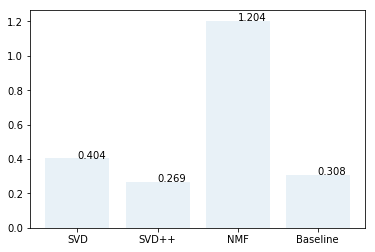

In [5]:
objects = ("SVD", "SVD++", "NMF", "Baseline")
y_pos = np.arange(len(objects))
performance = [svd_rmse, svdpp_rmse, nmf_rmse, baseline_rmse]
plt.bar(y_pos, performance, align='center', alpha=0.1)
plt.xticks(y_pos, objects)
for a,b in zip(y_pos, performance):
    plt.text(a, b, str("%.3f"%b))
plt.show()